# Coursework: A Classification Problem

## General Exploration of Data

#### Statistics and Machine Learning 2

Information from:
<https://archive.ics.uci.edu/ml/datasets/Vertebral+Column>

Data set containing values for six biomechanical features used to classify orthopaedic patients into 2 classes (normal or abnormal).

**Data Set Information:** Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied Research in Orthopaedics (GARO) of the Centre Medico-Chirurgical de Redaptation des Massues, Lyon, France.

**Attribute Information:** Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: Normal (NO) and Abnormal (AB).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Define the column names since they are not provided in the file:
column_names = [
    "pelvic_incidence", 
    "pelvic_tilt", 
    "lumbar_lordosis_angle", 
    "sacral_slope", 
    "pelvic_radius", 
    "grade_of_spondylolisthesis", 
    "class"
]

# Importing data:
data = pd.read_csv('/Users/alexander/Documents/MSc Data Science/S2/Statistics and Machine Learning 2/A1/raw/vertebral_column_data.txt', sep = r'\s+', header=None, names=column_names)
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


There are 6 features and the output of 310 patients:

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic_incidence            310 non-null    float64
 1   pelvic_tilt                 310 non-null    float64
 2   lumbar_lordosis_angle       310 non-null    float64
 3   sacral_slope                310 non-null    float64
 4   pelvic_radius               310 non-null    float64
 5   grade_of_spondylolisthesis  310 non-null    float64
 6   class                       310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


No missing values in the data:

In [18]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 pelvic_incidence              0
pelvic_tilt                   0
lumbar_lordosis_angle         0
sacral_slope                  0
pelvic_radius                 0
grade_of_spondylolisthesis    0
class                         0
dtype: int64


In [19]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


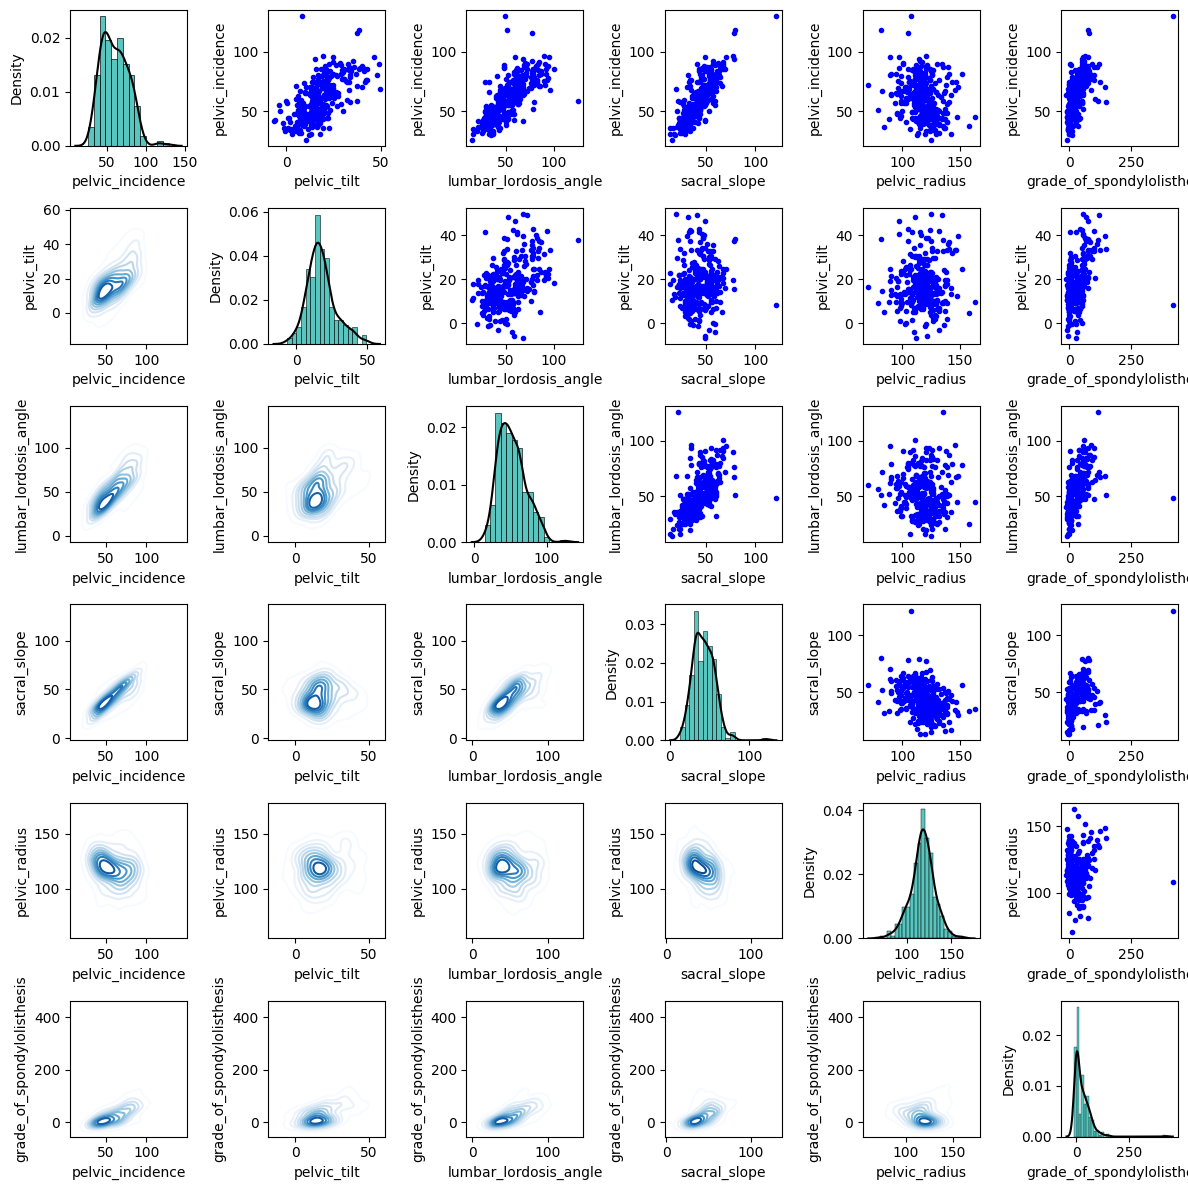

In [20]:
# We want to plot only the six numeric features
numeric_features = column_names[:-1]  # all columns except the last one ('class')
X = data[numeric_features].values
names = numeric_features

nDataSets = len(names)
plt.figure(figsize=(12, 12))

# Get the seaborn version parts to decide which plotting function to use
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

for i in range(nDataSets):
    for j in range(nDataSets):
        plt.subplot(nDataSets, nDataSets, 1 + i + (nDataSets * j))
        if i == j:
            # Diagonal: histograms and KDEs for each variable
            if int(versionStrParts[1]) < 11:
                sns.distplot(X[:, i], color="b")
            else:
                sns.kdeplot(X[:, i], color="black", label="Kernel Density")
                sns.histplot(X[:, i], stat="density", color="lightseagreen")
            plt.xlabel(names[i])
            plt.ylabel('Density')
        else:
            if i < j:
                # Below diagonal: two-dimensional KDE plots
                if int(versionStrParts[1]) < 11:
                    sns.kdeplot(data=np.ravel(X[:, i]), data2=np.ravel(X[:, j]), cmap="Blues")
                else:
                    sns.kdeplot(x=np.ravel(X[:, i]), y=np.ravel(X[:, j]), cmap="Blues")
            else:
                # Above diagonal: scatterplots
                plt.scatter(X[:, i], X[:, j], c="b", marker=".")
            
            plt.xlabel(names[i])
            plt.ylabel(names[j])

plt.tight_layout()
plt.show()

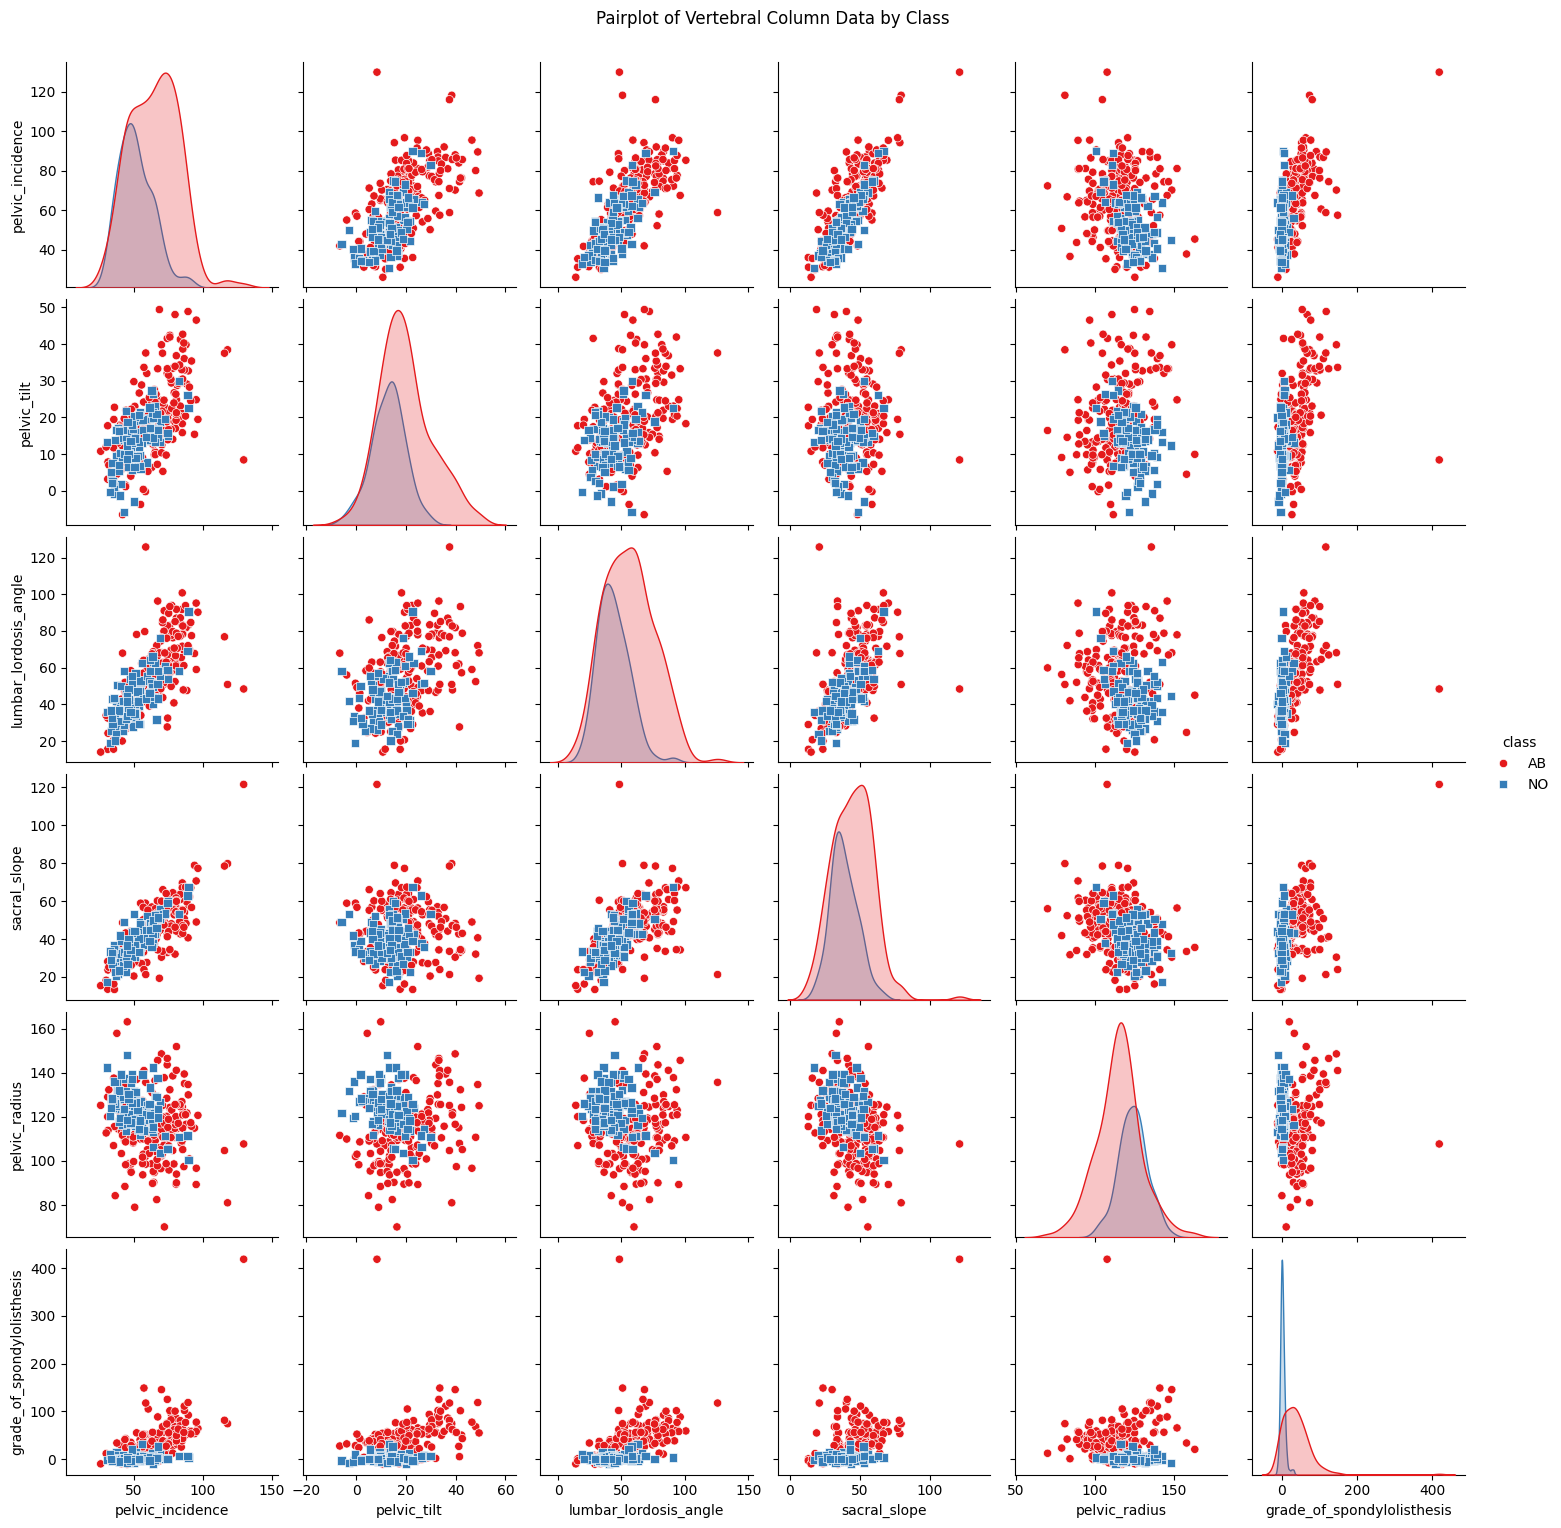

In [21]:
sns.pairplot(data, vars=numeric_features, hue="class", diag_kind="kde", palette="Set1", markers=["o", "s"])
plt.suptitle("Pairplot of Vertebral Column Data by Class", y=1.02)
plt.show()

### General Comments

- We should consider applying log transformations to variables such as *grade_of_spondylolisthesis*, especially if we plan to use k-means as the algorithm for unsupervised classification.
- At least for me, it’s clear that we have two joint distributions (or clusters), but one is nested within the other. I’m not sure how to handle this type of scenario, but I will research it further—perhaps using kernel k-means or model-based clustering.
- Some of the combined distributions are spherical, for which k-means is suitable; however, for variables like *pelvic_incidence* or
*grade_of_spondylolisthesis*, this is less clear.
For the supervised classification part, I assume we can perform cross-validation, tune hyperparameters, and select the best-performing model. However, I have the feeling that the professor wants us to justify our modeling decisions not only with an empirical approach but also based on the data structure. I will look into this further.